# Kernel PCA

In [1]:
from sklearn.datasets import make_circles

In [2]:
from sklearn.decomposition import PCA, KernelPCA

In [3]:
import numpy as np
import pandas as pd

In [4]:
np.random.seed(0)

In [5]:
X, y = make_circles(n_samples=400, factor=0.3, noise=0.05)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

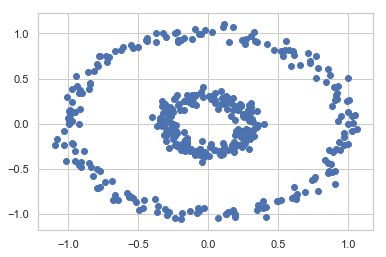

In [14]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1])

In [15]:
kpca = KernelPCA(kernel='rbf', fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

Text(0, 0.5, '$x_2$')

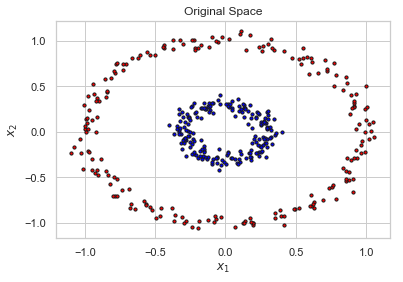

In [16]:
plt.figure()
plt.title("Original Space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c='red', s=10, edgecolors='k')
plt.scatter(X[blues, 0], X[blues, 1], c='blue', s=10, edgecolors='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Text(0, 0.5, '2nd Principal Component')

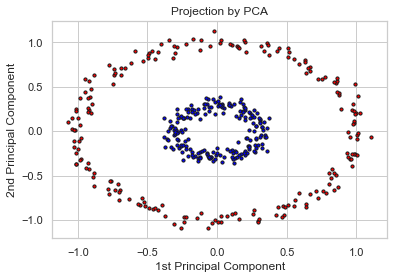

In [19]:
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c='red', s=10, edgecolors='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c='blue', s=10, edgecolors='k')

plt.title("Projection by PCA")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")

Text(0, 0.5, '2nd Principal Component')

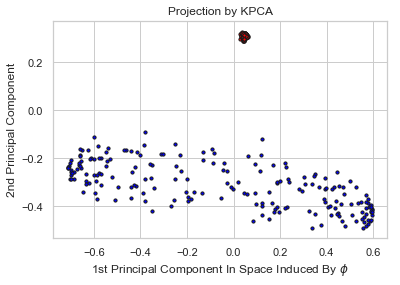

In [20]:
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c='red', s=10, edgecolors='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c='blue', s=10, edgecolors='k')

plt.title("Projection by KPCA")
plt.xlabel("1st Principal Component In Space Induced By $\phi$")
plt.ylabel("2nd Principal Component")

## Kernel PCA Example

In [21]:
df = sns.load_dataset('iris')
df = df[df['species'] != 'setosa']

In [22]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'versicolor': 0,
                  'virginica': 1}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [23]:
kpca = KernelPCA(kernel='rbf', n_components=2)
X_kpca = kpca.fit_transform(X)

In [27]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear')

In [28]:
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
Xv = X.values.reshape(-1, 1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

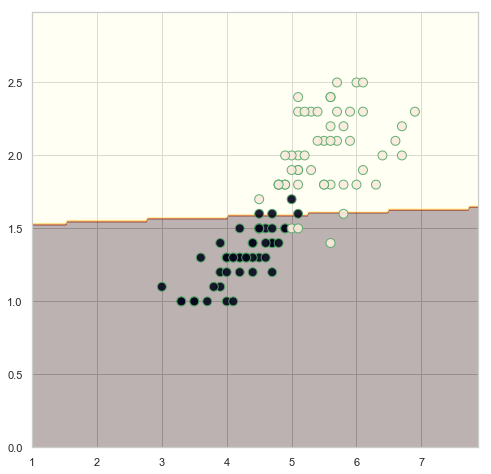

In [32]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,8))
ax = plt.contourf(xx, yy, z, cmap='afmhot', alpha=0.3)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, alpha=0.9, edgecolors='g')

In [33]:
clf.fit(X_kpca, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
Xv = X_kpca
h = 0.02
x_min, x_max = Xv.min() - 0.5, Xv.max() + 0.5
y_min, y_max = y.min() - 0.5, y.max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

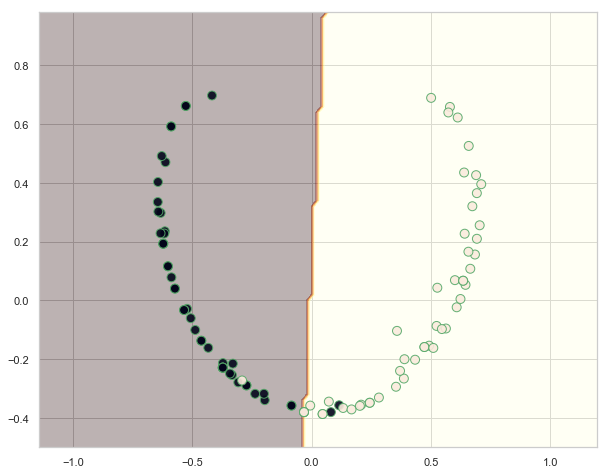

In [38]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(10,8))
ax = plt.contourf(xx, yy, z, cmap='afmhot', alpha=0.3)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, s=80, alpha=0.9, edgecolors='g')